# Objective

__Scenerio:__

       PR firm, ExoPublic, has noticed the immense success generated through popular social media app - Tiktok. In 2023, the social media app has over 1.53 billion users, with over 1 billion videos watched daily (1). Celebrities, politicians, social media influencers, and most notibly, average, everyday people, have all been able to successfuly generate support for and/or promote their agenda through Tiktok. 
       ExoPublic wants to fill their client's audience gap by begining to direct their clients to generate a presence on Tiktok. However, the firm has limited knowledge of the app and does not know how to guide clients or what constitutes Tiktok success.
       ExoPublic has asked for the help of data scientist to determine how to generate success on Tiktok. The objective of the analysis of the dataset "Top 1000 Tiktokers all over the world" is to determine drivers and models for success on Tiktok. 
       
    1 https://www.demandsage.com/tiktok-user-statistics/

# Imports

In [1]:
# standard imports
import numpy as np
import pandas as pd
# train, test, split
from sklearn.model_selection import train_test_split
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# stats
from scipy import stats
# modeling
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.metrics import explained_variance_score
# .py files with callable functions
import wrangle
import visuals
import stats_and_modeling
# notebook formatting
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

# Acquire

    My acquired data set is named "Top 1000 Tiktokers all over the world". The csv file was downloaded from kaggle:
https://www.kaggle.com/datasets/syedjaferk/top-1000-tiktokers

    The data was published to kaggle by user Syed Jafer using collection method - scrapping and source - internet. No date is available.

__Data Dictionary:__

_original data set_
   __________________________________________________________________
    Rank:              |Overall rank based on followers and popularity
   __________________________________________________________________
    Username:          |Handle used in tiktok.
   __________________________________________________________________
    Tiktok Link:       |Url for the user. 
   __________________________________________________________________
    Name:              |Account Name
   __________________________________________________________________
    Subscribers Count: |No of subscribers/followers
   __________________________________________________________________
    Views. Avg:        |Avg Views of the content.
   __________________________________________________________________
    Likes Avg:         |Average likes
   __________________________________________________________________
    Comments. Avg:     |Average Comments
   __________________________________________________________________
    Shares. Avg:       |Average Shares
   __________________________________________________________________
   
_created columns from the original data set_
   __________________________________________________________________
    engagement:        |The sum of avg.views, avg.likes, avg.comments, and avg.shares.
                       |df['engagement'] = (avg.views + avg.likes + avg.comments + avg.shares)

   __________________________________________________________________

### Original Data Set

In [2]:
# import data from .csv file using import function from wrangle.py
# data will be imported as a dataframe and
# this function will also return a data summary including:
# shape, stats, info, data types, null values, na values, 
# unique value counts, columns, and column value counts
df = wrangle.import_df('top_1000_tiktokers.csv')

__________________________________________________
Shape: 
(1000, 9)
__________________________________________________
Stats: 
       count   mean         std  min     25%    50%     75%     max
Rank  1000.0  500.5  288.819436  1.0  250.75  500.5  750.25  1000.0
__________________________________________________
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               1000 non-null   int64 
 1   Username           1000 non-null   object
 2   Tiktok Link        1000 non-null   object
 3   Name               998 non-null    object
 4   Subscribers Count  1000 non-null   object
 5   Views. Avg         1000 non-null   object
 6   Likes. Avg         1000 non-null   object
 7   Comments. Avg      1000 non-null   object
 8   Shares. Avg        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
None


In [3]:
# view first 5 rows of data
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


### Clean Data Set

In [4]:
df = wrangle.prep_data(df)
df.head()

,rank,username,subscribers,views,likes,comments,shares,engagement
0,1,badbunny,23400000.0,63100000.0,10300000.0,65200.0,108600.0,96973800.0
1,2,noahschnapp,26100000.0,23400000.0,4800000.0,46700.0,22100.0,54368800.0
2,3,khaby.lame,145900000.0,47500000.0,2500000.0,46000.0,9400.0,195955400.0
3,4,coopernoriega,3200000.0,31000000.0,1300000.0,120900.0,8400.0,35629300.0
4,5,avrillavigne,4000000.0,24700000.0,3500000.0,32100.0,22700.0,32254800.0


### Cleaned data frame, split into Train, Validate, and Test

In [5]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df, 'engagement')
X_train.head()

,rank,username,subscribers,views,likes,comments,shares
911,912,jairsanchezzz,6800000.0,997400.0,194600.0,1900.0,3500.0
484,485,manhtienkhoi_,3900000.0,2500000.0,238800.0,3400.0,1300.0
541,542,bhadbhabie,5600000.0,3500000.0,402400.0,1300.0,347.0
580,581,manusianlangit,2000000.0,2100000.0,255200.0,2200.0,1700.0
161,162,krisjenner,2900000.0,5000000.0,430000.0,6500.0,626.0


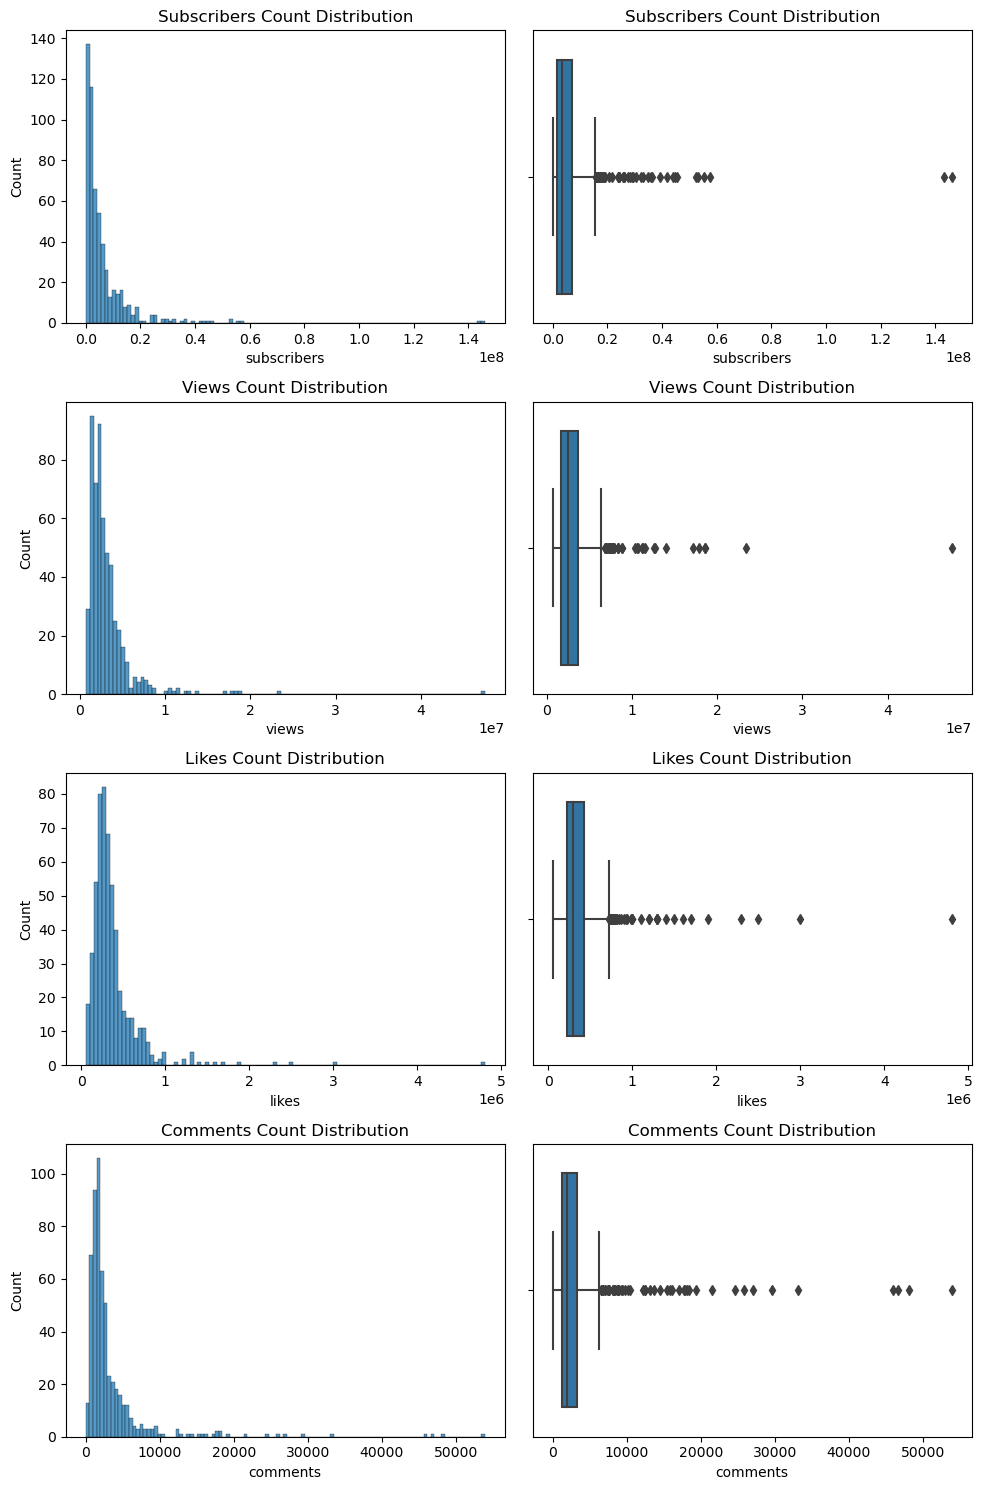

In [6]:
visuals.var_distributions(X_train)

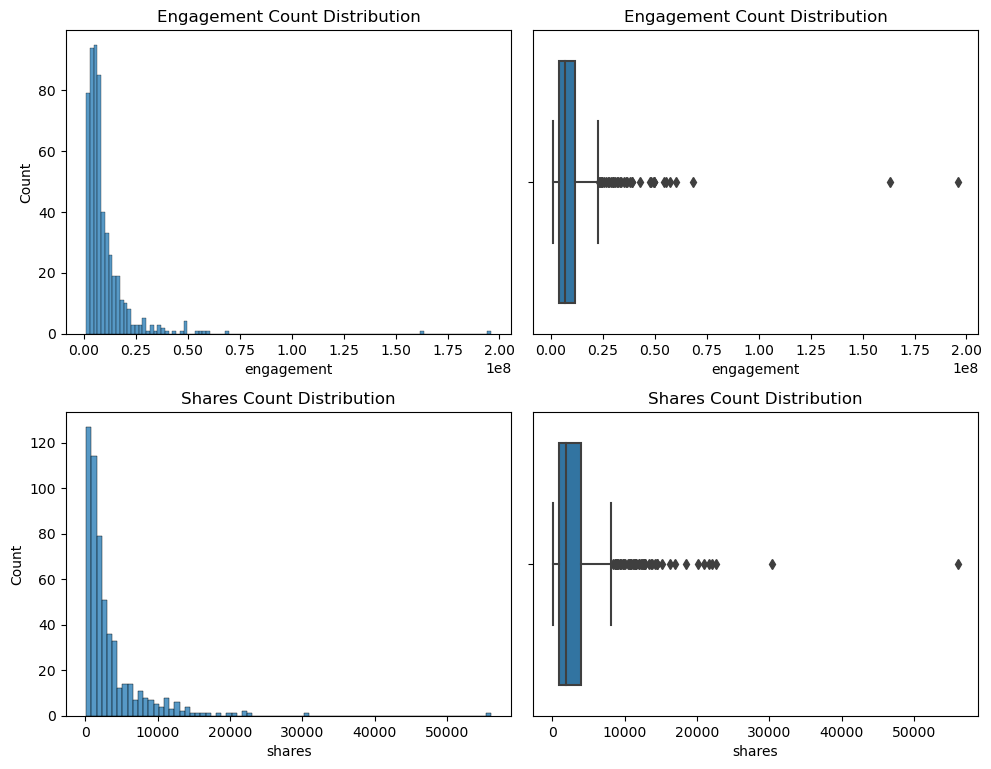

In [7]:
visuals.var_distributions_2(X_train, y_train)

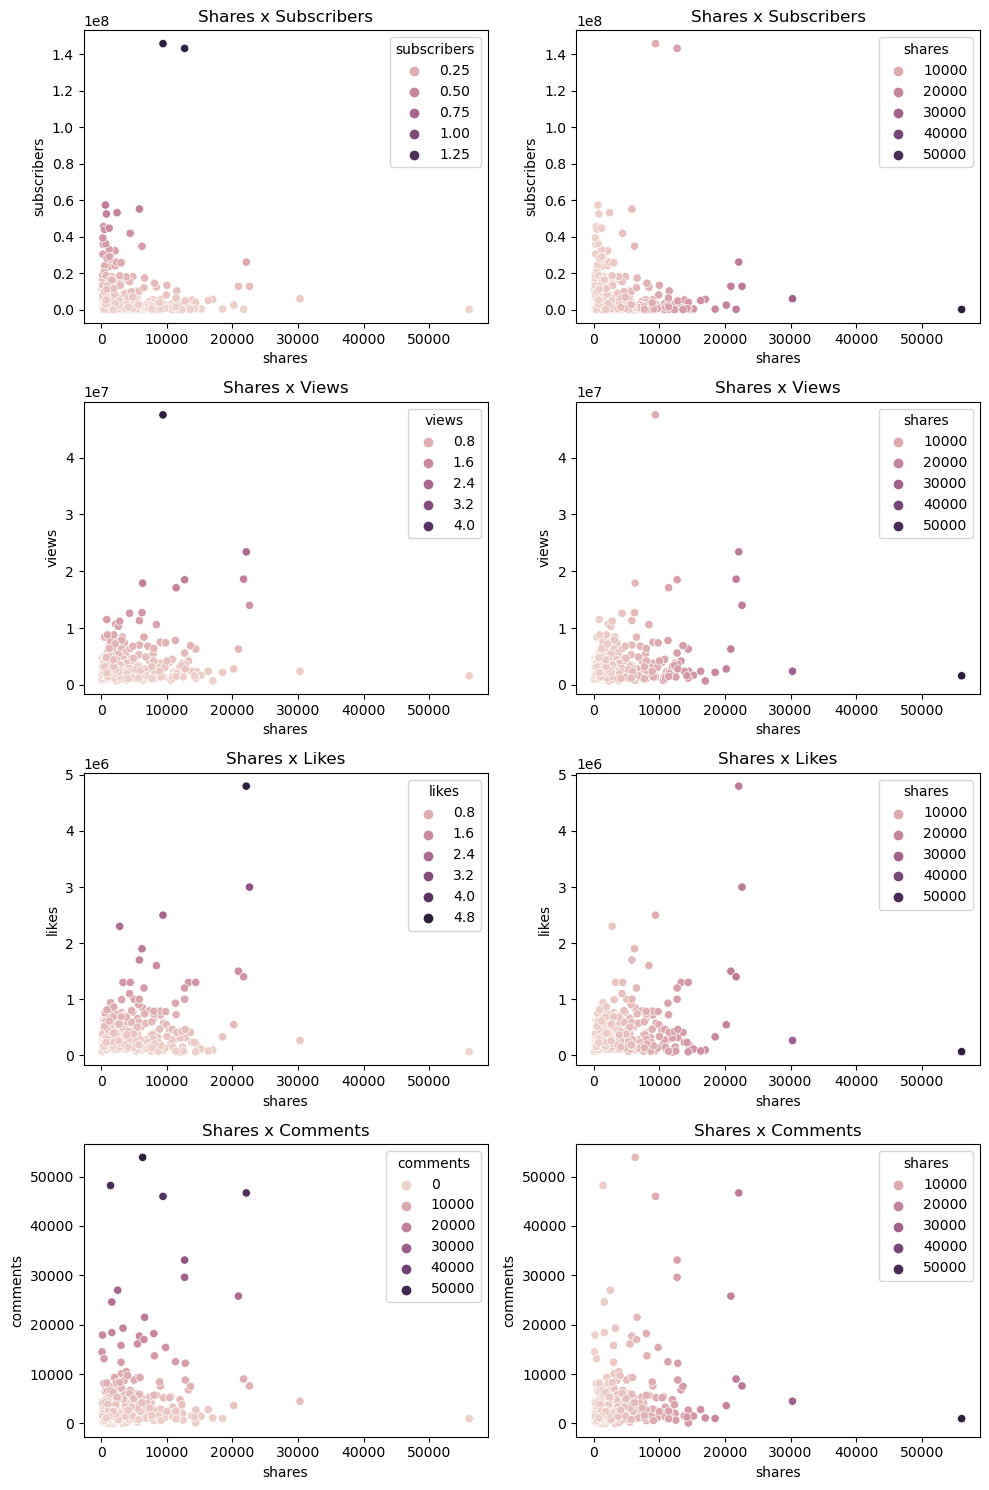

In [8]:
visuals.x_var_by_shares(X_train)

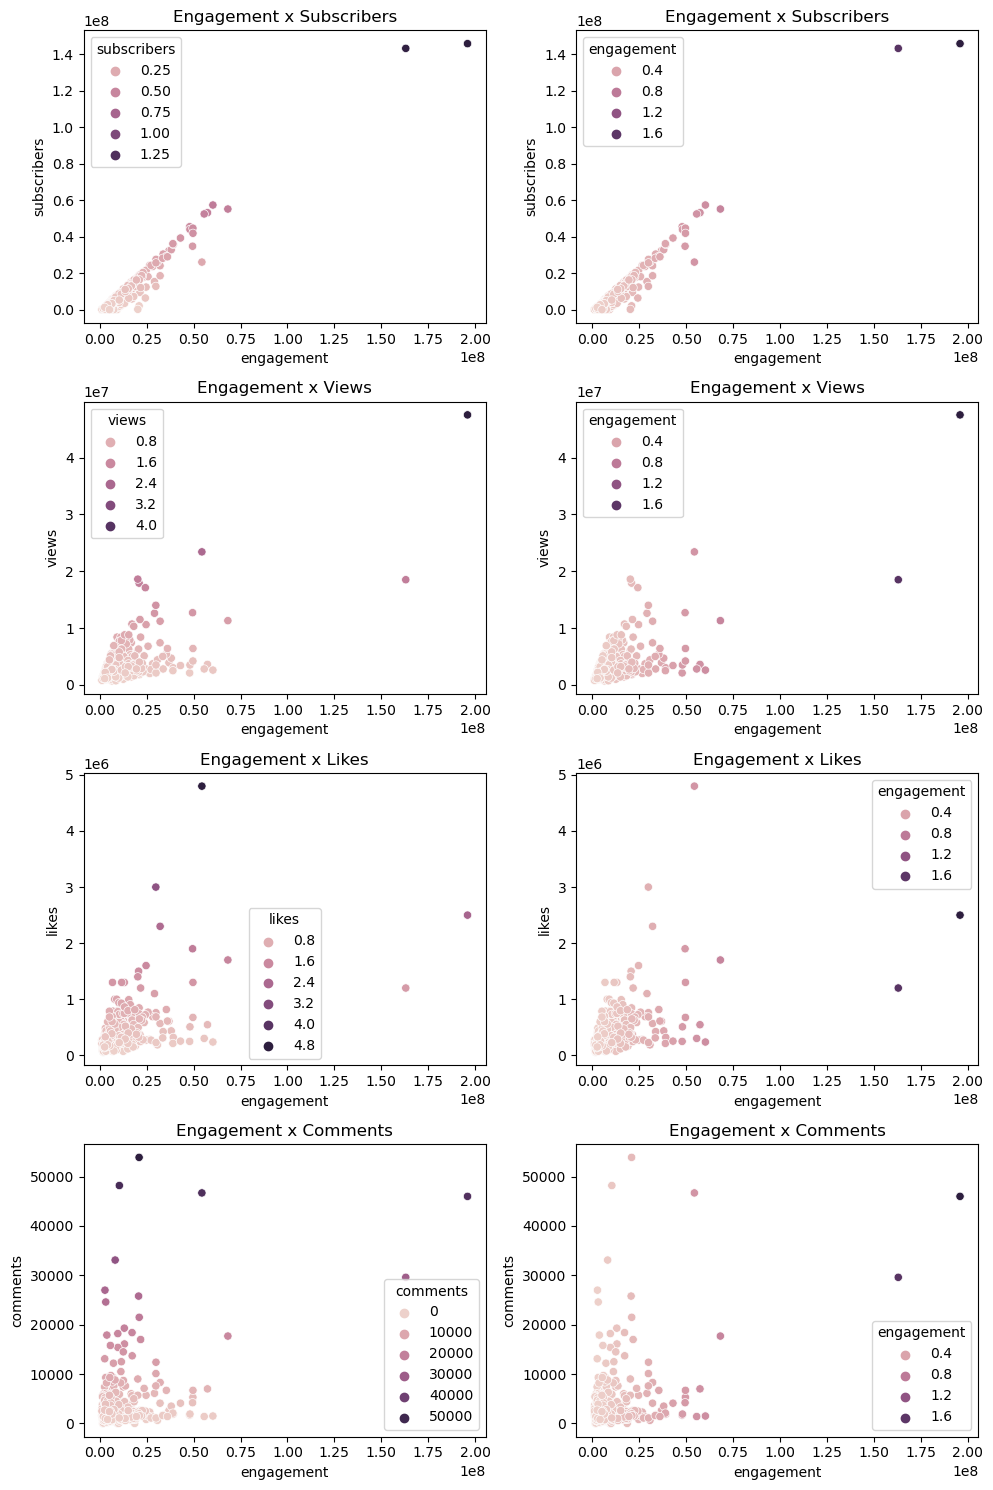

In [9]:
visuals.x_var_by_engage(X_train, y_train)

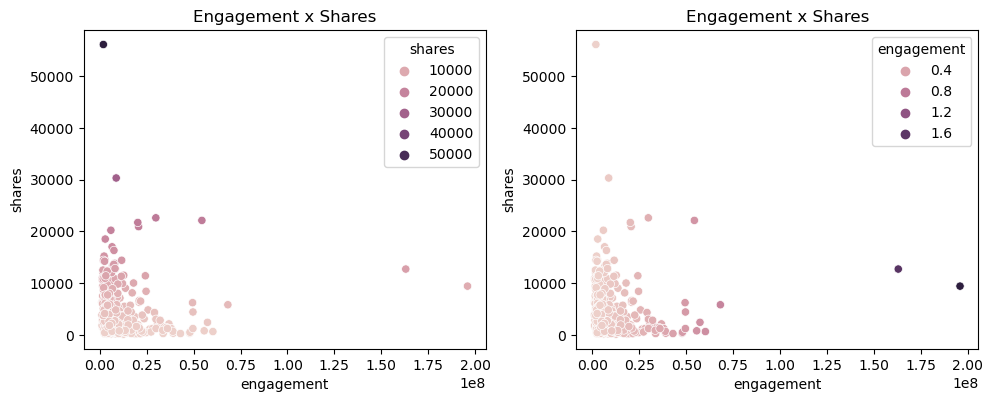

In [10]:
visuals.shares_x_engage(X_train, y_train)

### Stats Testing

__Views X Shares__

H$_0$: There __is not__ a statistically significant relationship between views and shares.

H$_a$: There __is__ a statistically significant relationship between views and shares.

In [11]:
stats_and_modeling.hypothesis_test(X_train.views, X_train.shares)

P-value: 2.016181201897811e-06 
r-value: 0.19975610504987135 
I reject the null hypothesis.


__Likes X Shares__

H$_0$: There __is not__ a statistically significant relationship between likes and shares.

H$_a$: There __is__ a statistically significant relationship between likes and shares.

In [12]:
stats_and_modeling.hypothesis_test(X_train.likes, X_train.shares)

P-value: 5.445089569735497e-10 
r-value: 0.25902548137130954 
I reject the null hypothesis.


__Comments X Shares__

H$_0$: There __is not__ a statistically significant relationship between comments and shares.

H$_a$: There __is__ a statistically significant relationship between comments and shares.

In [13]:
stats_and_modeling.hypothesis_test(X_train.comments, X_train.shares)

P-value: 2.9623131707961505e-08 
r-value: 0.23219579423361644 
I reject the null hypothesis.


---------------------------------------------------------------------

__Subscribers X Engagement__

H$_0$: There __is not__ a statistically significant relationship between Subscribers and Engagement.

H$_a$: There __is__ a statistically significant relationship between Subscribers and Engagement.

In [14]:
stats_and_modeling.hypothesis_test(X_train.subscribers, y_train.engagement)

P-value: 0.0 
r-value: 0.9788016118597235 
I reject the null hypothesis.


__Views X Engagement__

H$_0$: There __is not__ a statistically significant relationship between Views and Engagement.

H$_a$: There __is__ a statistically significant relationship between Views and Engagement.

In [15]:
stats_and_modeling.hypothesis_test(X_train.views, y_train.engagement)

P-value: 1.3572177938450673e-81 
r-value: 0.6951291206740418 
I reject the null hypothesis.


__Likes X Engagement__

H$_0$: There __is not__ a statistically significant relationship between Likes and Engagement.

H$_a$: There __is__ a statistically significant relationship between Likes and Engagement.

In [16]:
stats_and_modeling.hypothesis_test(X_train.likes, y_train.engagement)

P-value: 9.922191037848925e-38 
r-value: 0.5071040459770786 
I reject the null hypothesis.


__Comments X Engagement__

H$_0$: There __is not__ a statistically significant relationship between Comments and Engagement.

H$_a$: There __is__ a statistically significant relationship between Comments and Engagement.

In [17]:
stats_and_modeling.hypothesis_test(X_train.comments, y_train.engagement)

P-value: 6.6247185563867825e-25 
r-value: 0.4175116147047191 
I reject the null hypothesis.


__Shares X Engagement__

H$_0$: There __is not__ a statistically significant relationship between Shares and Engagement.

H$_a$: There __is__ a statistically significant relationship between Shares and Engagement.

In [18]:
stats_and_modeling.hypothesis_test(y_train.engagement, X_train.shares)

P-value: 0.3064806043944053 
r-value: 0.043407511330542756 
I fail to reject the null hypothesis.


# Modeling

In [19]:
rmse_train_mu, rmse_validate_mu = stats_and_modeling.rmse_using_mu(y_train, y_validate)
rmse_train_mu, rmse_validate_mu

RMSE using Mean
    Train/In-Sample: 13747032.5 
    Validate/Out-of-Sample: 14628680.12


(13747032.50118542, 14628680.115380658)

In [20]:
metric_df = stats_and_modeling.create_models_df(rmse_train_mu, rmse_validate_mu, y_train, y_validate)
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,1.374703e+07,1.462868e+07,-2.220446e-16


In [21]:
rmse_train, rmse_validate = stats_and_modeling.rmse_using_ols(X_train, y_train, X_validate, y_validate)
rmse_train

RMSE for OLS using LinearRegression
    Training/In-Sample:  1.5170080805638816e-08 
    Validation/Out-of-Sample: 1.697643170275508e-08


1.5170080805638816e-08

In [22]:
metric_df = stats_and_modeling.add_to_models_df('OLS Regressor', metric_df, rmse_train, y_train, rmse_validate, y_validate)
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,1.374703e+07,1.462868e+07,-2.220446e-16
1,OLS Regressor,1.517008e-08,1.697643e-08,1.000000e+00


In [23]:
rmse_train, rmse_validate = stats_and_modeling.rmse_using_lassolars(X_train, y_train, X_validate, y_validate)

RMSE for Lasso + Lars
    _____________________
    Training/In-Sample: 0.3573762726722311, 
    Validation/Out-of-Sample:  0.6301108215699281
    Difference:  0.27273454889769705


In [24]:
metric_df = stats_and_modeling.add_to_models_df('lasso_alpha0.01', metric_df, rmse_train, y_train, rmse_validate, y_validate)
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,1.374703e+07,1.462868e+07,-2.220446e-16
1,OLS Regressor,1.517008e-08,1.697643e-08,1.000000e+00
2,lasso_alpha0.01,3.573763e-01,6.301108e-01,1.000000e+00


### Conclusion
My models have failed to outperform the baseline. R2 values are nearly 0, indicating regression is unable to explain engagement variance. Knowing this, I will move forward with feature engineering and classification modeling.